In [15]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import xlrd as xlrd
%matplotlib inline

In [16]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

# KRX Data

In [17]:
df_krx = fdr.StockListing('KRX')
df_krx.head()
df_krx.shape

(2612, 10)

FinanceDataReader Library: https://github.com/FinanceData/FinanceDataReader

df_krx contains Stocks data of all exchange on the KRX, namely: KOSPI, KOSDAQ, and KONEX. 


# ETF Data

In [18]:
df_etf = fdr.EtfListing('KR')
df_etf.head(10)

,Symbol,Name
0,069500,KODEX 200
1,102110,TIGER 200
2,153130,KODEX 단기채권
3,252670,KODEX 200선물인버스2X
4,310970,TIGER MSCI Korea TR
5,278540,KODEX MSCI Korea TR
6,122630,KODEX 레버리지
7,278530,KODEX 200TR
8,102780,KODEX 삼성그룹
9,273130,KODEX 종합채권(AA-이상)액티브


TIGER 인도니프티50 레버리지(합성) (236350)

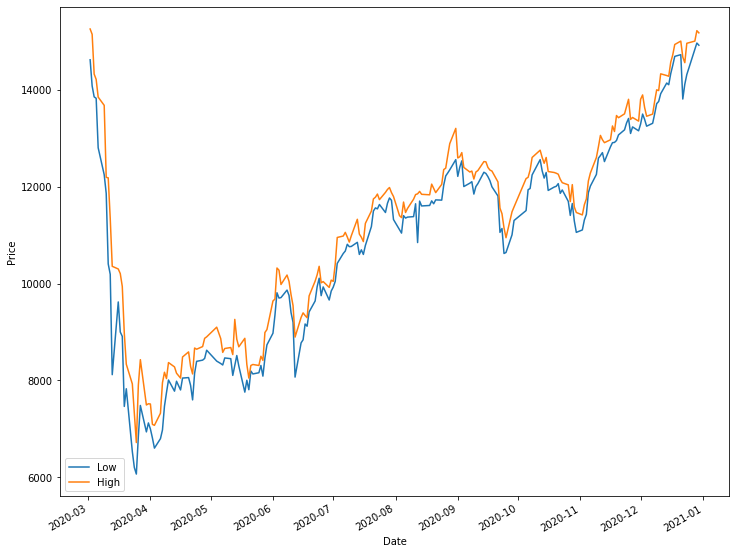

In [19]:
df = fdr.DataReader('236350', '2020-03-01')
df = df[['Low','High']]
df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Rows with NaN Values

In [20]:
df_krx[df_krx.isna().any(axis=1)].head(5)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
10,001465,KOSPI,BYC우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
14,00104K,KOSPI,CJ4우(전환),NaN,NaN,NaT,NaN,NaN,NaN,NaN
17,011155,KOSPI,CJ씨푸드1우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
18,001045,KOSPI,CJ우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
20,097955,KOSPI,CJ제일제당 우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [31]:
df_krx.loc[df_krx['Name'] == '삼성전자']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
963,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


# Delisted Companies 

In [21]:
krx_delisting = fdr.StockListing('KRX-DELISTING')
krx_delisting.head(5)

,Symbol,Name,DelistingDate,Reason
0,284610,TS트릴리온,2020-12-30,피흡수합병
1,251960,엠에프엠코리아,2020-12-30,피흡수합병
2,057500,SKC 솔믹스,2020-12-23,타법인의 완전자회사로 편입
3,314130,지놈앤컴퍼니,2020-12-23,코스닥시장 이전상장
4,152330,코리아오토글라스,2020-12-18,해산 사유 발생


Find all Symbols from Delisted Companies

In [22]:
delisted_symbols = krx_delisting['Symbol'].to_numpy()
delisted_symbols

array(['284610', '251960', '057500', ..., '028450', '028440', '029260'],
      dtype=object)

Filter out symbols with data available

In [23]:
def validData(s):
    if fdr.DataReader(f"{s}", exchange='KRX-DELISTING').values.any():
        return True

In [ ]:
valid_array = []
for s in delisted_symbols:
    if validData(s):
        valid_array.append(s)

<AxesSubplot:xlabel='Date'>

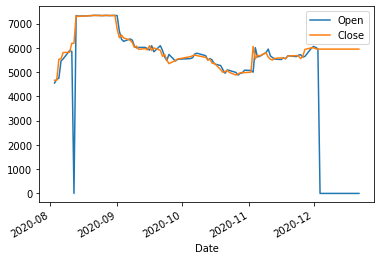

In [52]:
df = df[['Open','Close']]
df.plot()

# Check whether Delisted Data has been forward/backward filled 

In [56]:
type(krx_delisting['DelistingDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
old_days = krx_delisting[(krx_delisting['DelistingDate'] < '2010-01-01') ]
old_days

,Symbol,Name,DelistingDate,Reason
649,062730,케너텍,2009-12-23,회생절차폐지결정사유 및 당해 코스닥시장상장법인의 계속기업 가능성 유무를 고려한 결과...
650,045380,더존디지털,2009-12-09,피흡수합병
651,085680,모빌탑,2009-11-25,"기업의 계속성, 경영의 투명성 또는 기타 코스닥시장의 건전성 등을 종합적으로 고려하..."
652,036660,플러스프로핏,2009-11-20,감사범위 제한에 따른 감사의견 거절
653,014420,프로비타,2009-11-06,주된 영업의 정지에 의한 상장폐지기준 해당
...,...,...,...,...
1587,034370,럭키소재,1991-11-11,해산 사유 발생
1588,028460,태평양건설,1991-10-05,영업활동정지 6월 계속
1589,028450,금성투자금융,1991-09-02,해산 사유 발생
1590,028440,삼화,1991-07-12,감사의견 의견거절


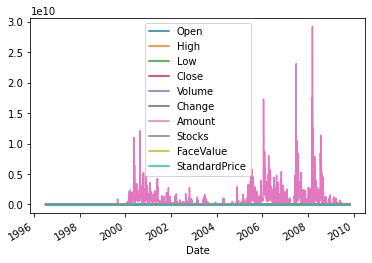

In [77]:
df_old = fdr.DataReader('014420', exchange='KRX-DELISTING')
df_old.plot()
plt.show()